In [1]:
import os, sys, time, resource, re, gc, shutil
from multiprocess import Pool
from functools import partial
from tabulate import tabulate
from urllib.parse import urlparse, parse_qsl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mongoengine.queryset.visitor import Q
import django
from django.db.models import Count
sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
from django.db.models import F

In [2]:
run_id=359
qid=1603

In [9]:
tars = TopicARScores.objects.filter(
    topic__run_id=run_id,
    ar__name__isnull=False,
    share__isnull=False
).order_by('-share')

df = pd.DataFrame.from_dict(list(tars.values('topic__title','ar__name','share'))).fillna(0)

df.head()

,ar__name,share,topic__title
0,AR2,0.112458,Planning & governance
1,AR3,0.104556,Planning & governance
2,AR4,0.099505,Planning & governance
3,AR5,0.096023,Planning & governance
4,AR6,0.094254,Planning & governance


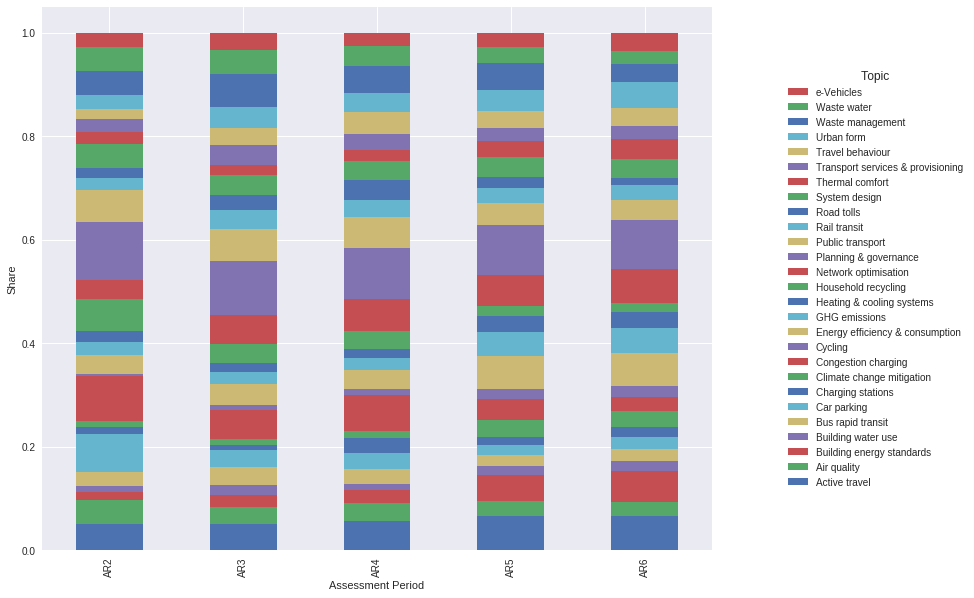

In [11]:
plt.rcParams["figure.figsize"] = [12,10]

fig, ax = plt.subplots(1,1)

pdf = df.pivot('ar__name','topic__title','share')
pdf.head()

pdf.plot.bar(stacked=True,ax=ax)

handles, labels = ax.get_legend_handles_labels()

lpos = (1.1,0.9)

ax.legend(handles[::-1], labels[::-1],title='Topic',bbox_to_anchor=lpos)

ax.set_xlabel('Assessment Period')
ax.set_ylabel('Share')

plt.savefig('../plots/topic_ap_shares_bars.png',bbox_inches='tight') 

plt.show()

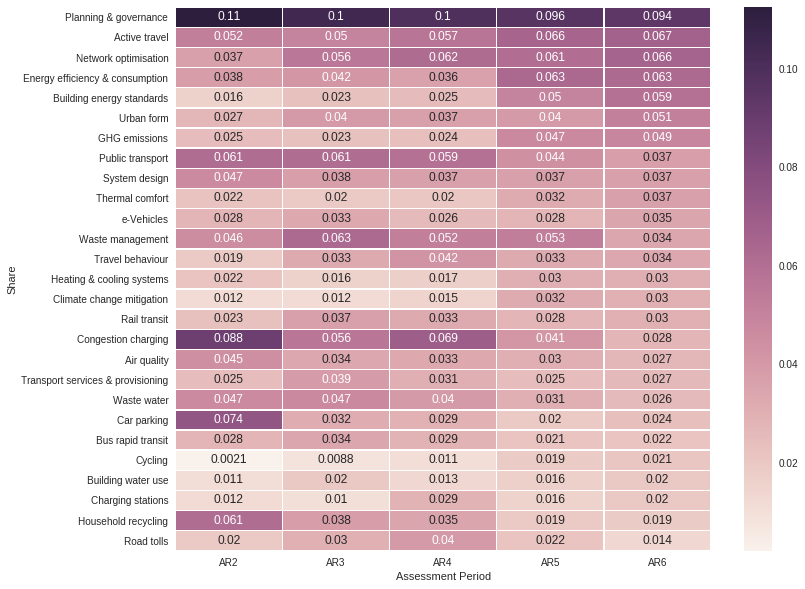

In [5]:

import seaborn as sns
sns.set()

v = 'share'

gdf = pd.DataFrame.from_dict(
    list(tars.values('topic__title','ar__name',v))
)

plt.rcParams["figure.figsize"] = [12,10]

ppdf = gdf.pivot('topic__title','ar__name',v).fillna(0).sort_values('AR6',ascending=False)

sns.heatmap(ppdf, annot=True, linewidths=.5)

plt.xlabel('Assessment Period')
plt.ylabel('Share')

plt.savefig('../plots/topic_ap_shares_heatmap.png',bbox_inches='tight')     

plt.show()



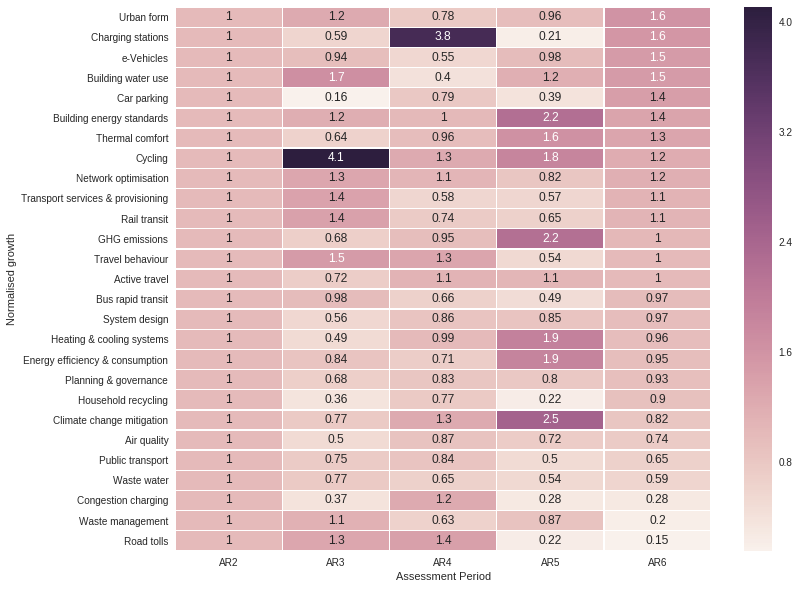

In [6]:

import seaborn as sns
sns.set()

v = 'pgrowthn'

gdf = pd.DataFrame.from_dict(
    list(tars.values('topic__title','ar__name',v))
)

plt.rcParams["figure.figsize"] = [12,10]

ppdf = gdf.pivot('topic__title','ar__name',v).fillna(0).sort_values('AR6',ascending=False)

sns.heatmap(ppdf, annot=True, linewidths=.5)

plt.xlabel('Assessment Period')
plt.ylabel('Normalised growth')

plt.savefig('../plots/topic_ap_normalised_growth.png',bbox_inches='tight')   

plt.show()
